## Descrição das variáveis
#### date – dia em que foi efetuado o registo.
#### all – entrada diária de todas pessoas (faces humanas) na loja.
#### female – entrada de todos elementos identificados como pertencentes ao género feminino.
#### male - igual ao atributo anterior mas relacionado com o género masculino.
#### young – entradas com estimativa de idade jovem (até 18 anos).
#### adult - entradas com estimativa de idade adulta (>18 anos).
#### weather – estado do tempo no exterior (“Sunny” ou “Rain”).
#### maxtemp, RH, maxwind – estado do tempo no exterior para o dia (temperatura máxima, humidade relativa máxima, velocidade do vento máximo).

## Importing Libraries

In [1]:
library(tidyverse)
library(ggplot2)
library(corrplot)


Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
corrplot 0.92 loaded


In [2]:
data <- read.csv(file = 'store.csv', sep = ';')
data

date,all,female,male,young,adult,weather,maxtemp,RH,maxwind
2013-04-09,2332.0,1115.0,1108,1122,1210.0,Rain,13,87,0
2013-04-10,2801.0,1217.0,1459,1239,1562.0,Rain,14,94,45
2013-04-11,2375.0,1168.0,1099,1059,1316.0,Rain,14,82,55
2013-04-12,3447.0,1617.0,1651,1606,1841.0,Sunny,13,78,0
2013-04-13,4823.0,2469.0,2117,2318,2505.0,Rain,16,81,37
2013-04-14,4978.0,2564.0,2223,2289,2689.0,Rain,16,73,0
2013-04-15,2706.0,1192.0,1401,1148,1558.0,Sunny,17,80,0
2013-04-16,2639.0,1220.0,1308,1110,1529.0,Sunny,17,70,32
2013-04-17,2647.0,1178.0,1329,1152,1495.0,Sunny,16,72,0
2013-04-18,2612.0,1257.0,1228,1064,1548.0,Sunny,16,72,53


In [46]:
cat('Head \n')
head(data)

cat('Tail \n')
tail(data)

cat('Glimpse \n')
glimpse(data)

cat('Number Columns \n')
ncol(data)

cat('Number Rows \n')
nrow(data)

cat('Column Names \n')
colnames(data)

cat('Summary \n')
summary(data)

cat('NA verification \n')
sum(is.na(data)) -> missing 
cat("There are", missing , "null/missing(NA) values")

Head 


date,all,female,male,young,adult,weather,maxtemp,RH,maxwind
2013-04-09,2332,1115,1108,1122,1210,Rain,13,87,0
2013-04-10,2801,1217,1459,1239,1562,Rain,14,94,45
2013-04-11,2375,1168,1099,1059,1316,Rain,14,82,55
2013-04-12,3447,1617,1651,1606,1841,Sunny,13,78,0
2013-04-13,4823,2469,2117,2318,2505,Rain,16,81,37
2013-04-14,4978,2564,2223,2289,2689,Rain,16,73,0


Tail 


,date,all,female,male,young,adult,weather,maxtemp,RH,maxwind
252,2013-12-16,3228,1442,1606,1625,1603,Sunny,10,87,32
253,2013-12-17,3191,1427,1627,1688,1503,Rain,11,90,24
254,2013-12-18,4153,2035,1880,2208,1945,Rain,10,93,0
255,2013-12-19,4307,2043,2028,2282,2025,Rain,12,86,74
256,2013-12-20,4660,2207,2227,2441,2219,Sunny,9,69,0
257,2013-12-21,6193,2894,2967,3115,3078,Sunny,9,68,0


Glimpse 
Observations: 257
Variables: 10
$ date    <fct> 2013-04-09, 2013-04-10, 2013-04-11, 2013-04-12, 2013-04-13,...
$ all     <dbl> 2332, 2801, 2375, 3447, 4823, 4978, 2706, 2639, 2647, 2612,...
$ female  <dbl> 1115, 1217, 1168, 1617, 2469, 2564, 1192, 1220, 1178, 1257,...
$ male    <int> 1108, 1459, 1099, 1651, 2117, 2223, 1401, 1308, 1329, 1228,...
$ young   <int> 1122, 1239, 1059, 1606, 2318, 2289, 1148, 1110, 1152, 1064,...
$ adult   <dbl> 1210, 1562, 1316, 1841, 2505, 2689, 1558, 1529, 1495, 1548,...
$ weather <fct> Rain, Rain, Rain, Sunny, Rain, Rain, Sunny, Sunny, Sunny, S...
$ maxtemp <int> 13, 14, 14, 13, 16, 16, 17, 17, 16, 16, 16, 18, 16, 17, 19,...
$ RH      <int> 87, 94, 82, 78, 81, 73, 80, 70, 72, 72, 62, 47, 49, 67, 51,...
$ maxwind <int> 0, 45, 55, 0, 37, 0, 0, 32, 0, 53, 0, 50, 0, 29, 35, 27, 48...
Number Columns 


[1] 10

Number Rows 


[1] 257

Column Names 


[1] "date"    "all"     "female"  "male"    "young"   "adult"   "weather"
 [8] "maxtemp" "RH"      "maxwind"

Summary 


         date          all            female          male          young     
 2013-04-09:  1   Min.   :  375   Min.   : 194   Min.   : 170   Min.   : 191  
 2013-04-10:  1   1st Qu.: 2569   1st Qu.:1139   1st Qu.:1327   1st Qu.:1122  
 2013-04-11:  1   Median : 3643   Median :1725   Median :1755   Median :1625  
 2013-04-12:  1   Mean   : 3648   Mean   :1698   Mean   :1776   Mean   :1648  
 2013-04-13:  1   3rd Qu.: 4314   3rd Qu.:2035   3rd Qu.:2057   3rd Qu.:1942  
 2013-04-14:  1   Max.   :15735   Max.   :7645   Max.   :7045   Max.   :7495  
 (Other)   :251                                                               
     adult       weather       maxtemp            RH           maxwind     
 Min.   : 184   Rain : 57   Min.   : 7.00   Min.   :24.00   Min.   : 0.00  
 1st Qu.:1433   Sunny:200   1st Qu.:16.00   1st Qu.:57.00   1st Qu.: 0.00  
 Median :2021               Median :19.00   Median :69.00   Median :32.00  
 Mean   :2000               Mean   :18.59   Mean   :67.23   Mean

NA verification 
There are 0 null/missing(NA) values

## Data Visualization

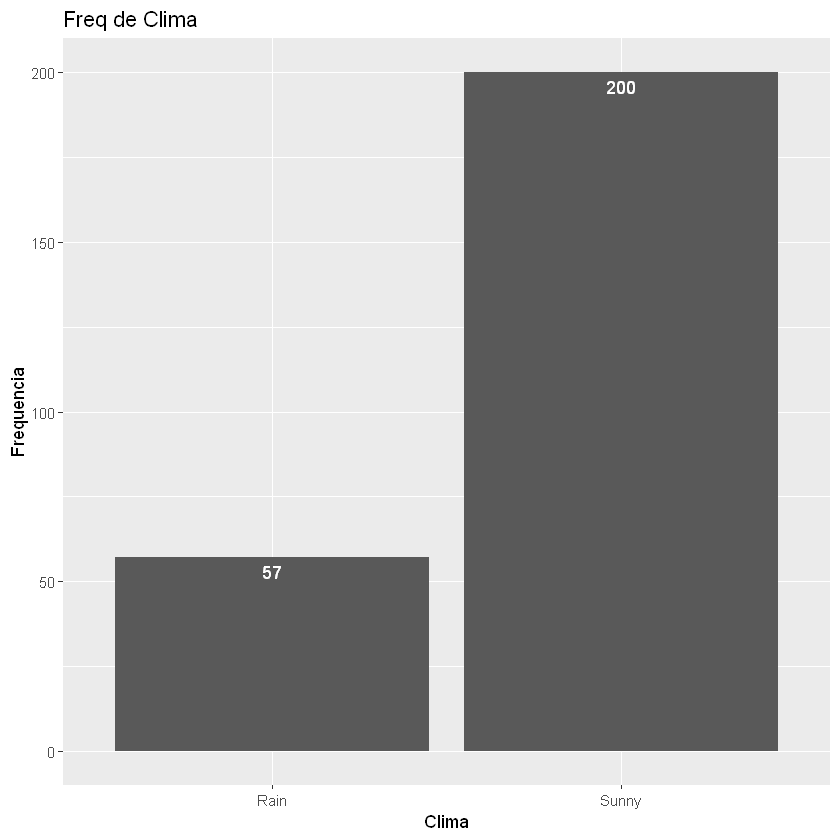

In [20]:
ggplot(data=data, aes(x=weather))+geom_bar()+
xlab("Clima")+
ylab("Frequencia")+
ggtitle("Freq de Clima")+
geom_text(aes(label = ..count..), stat = "count", vjust = 1.5, colour = "white")

In [57]:
prop.table(table(data$weather))


     Rain     Sunny 
0.2217899 0.7782101 

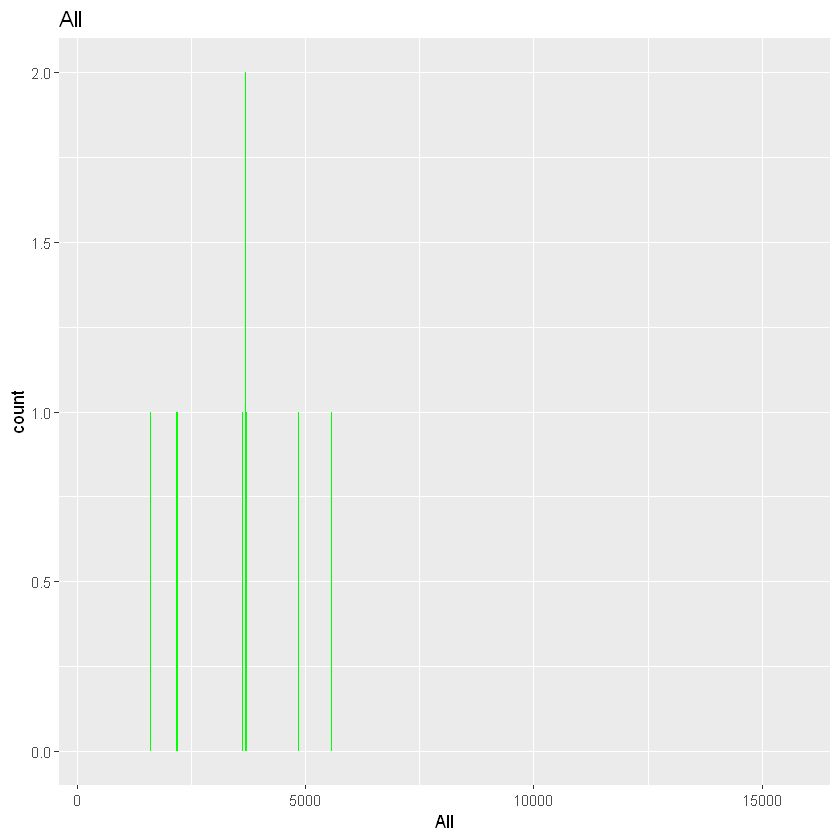

In [43]:
data %>%
    group_by(all) %>%
    count() %>%
    filter(n<5000) %>%
    ggplot()+
    geom_col(aes(all,n), fill='green')+
    ggtitle("All")+
    xlab("All")+
    ylab("count")

[1]  7961  9371  9163  8300  8270 15735  7719 11110

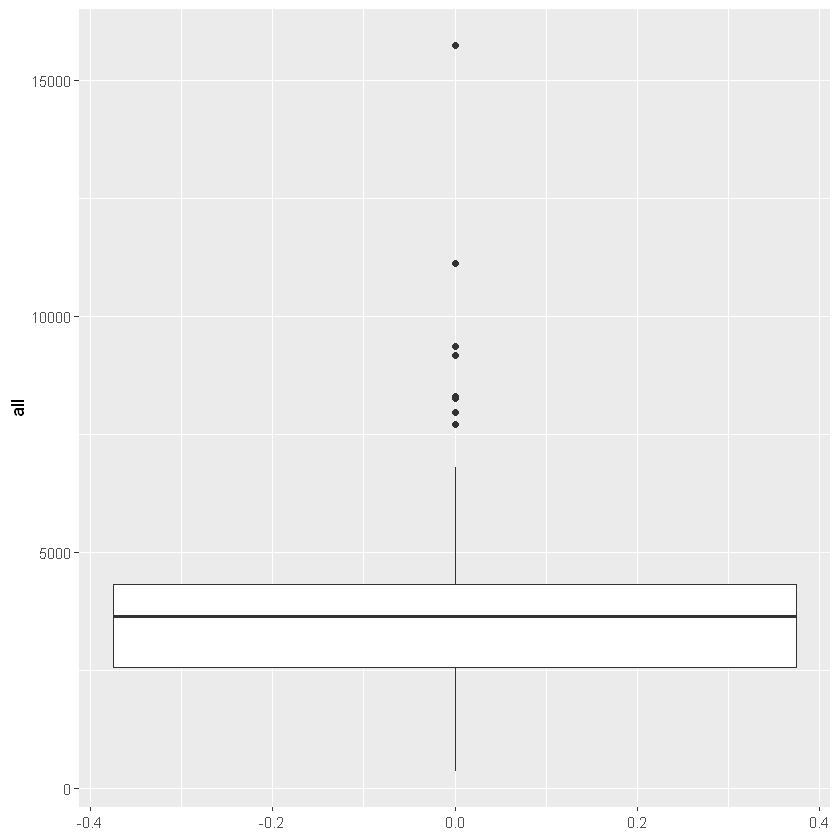

In [22]:
outliers <- boxplot.stats(data$all)$out
ggplot(data=data, aes(y=all))+geom_boxplot()
outliers

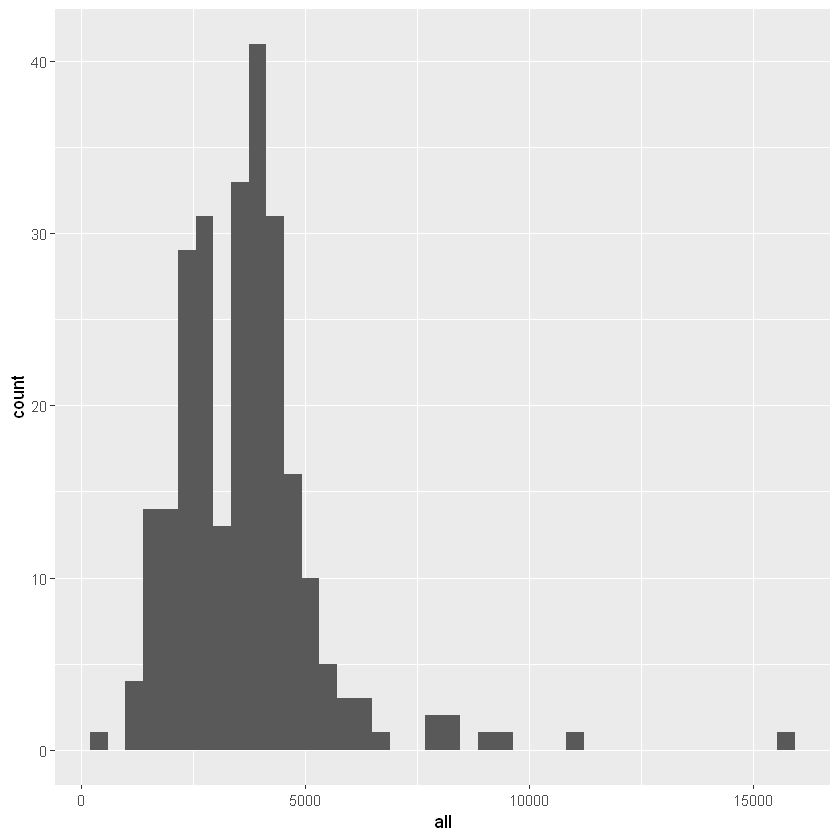

In [7]:
ggplot(data=data, aes(x=all))+geom_histogram(bins=40)

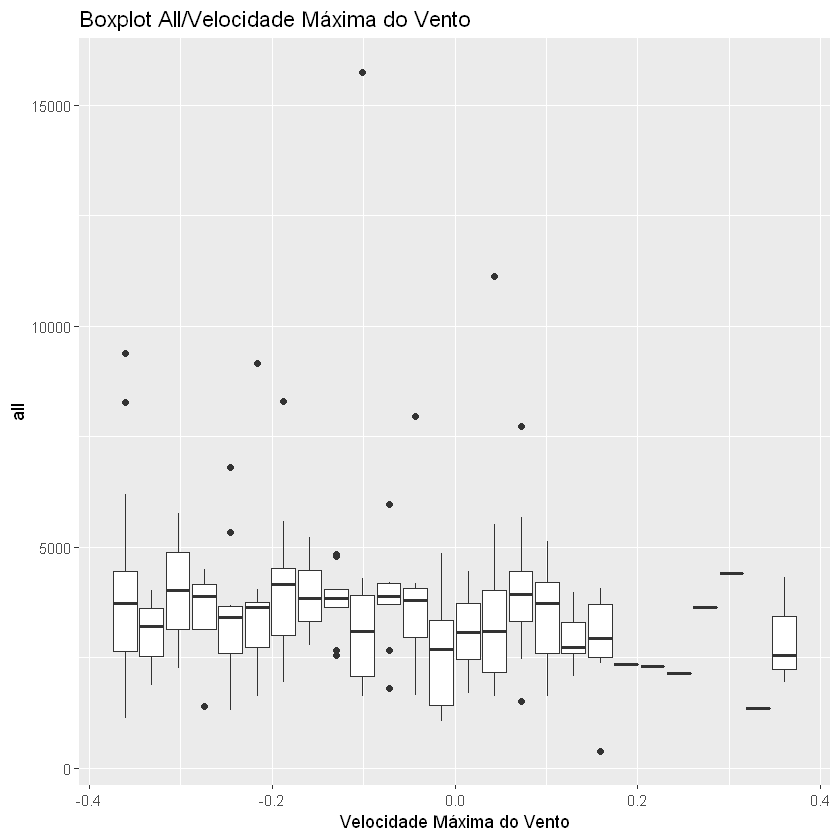

In [11]:
ggplot(data=data, aes(group=maxwind,y=all))+geom_boxplot()+xlab("Velocidade Máxima do Vento")+ggtitle("Boxplot All/Velocidade Máxima do Vento")

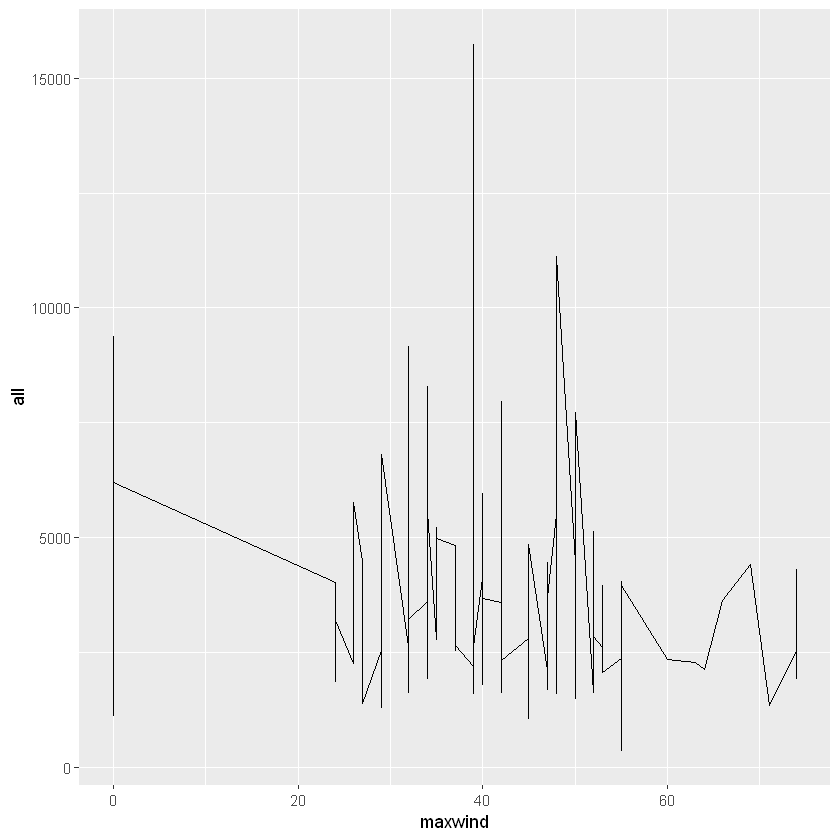

In [140]:
ggplot(data=data, aes(x=maxwind,y=all))+geom_line()

In [142]:
install.packages("corrplot")


  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.92             FALSE



installing the source package 'corrplot'



In [9]:
cor(data[2:6]) -> cor_pessoas

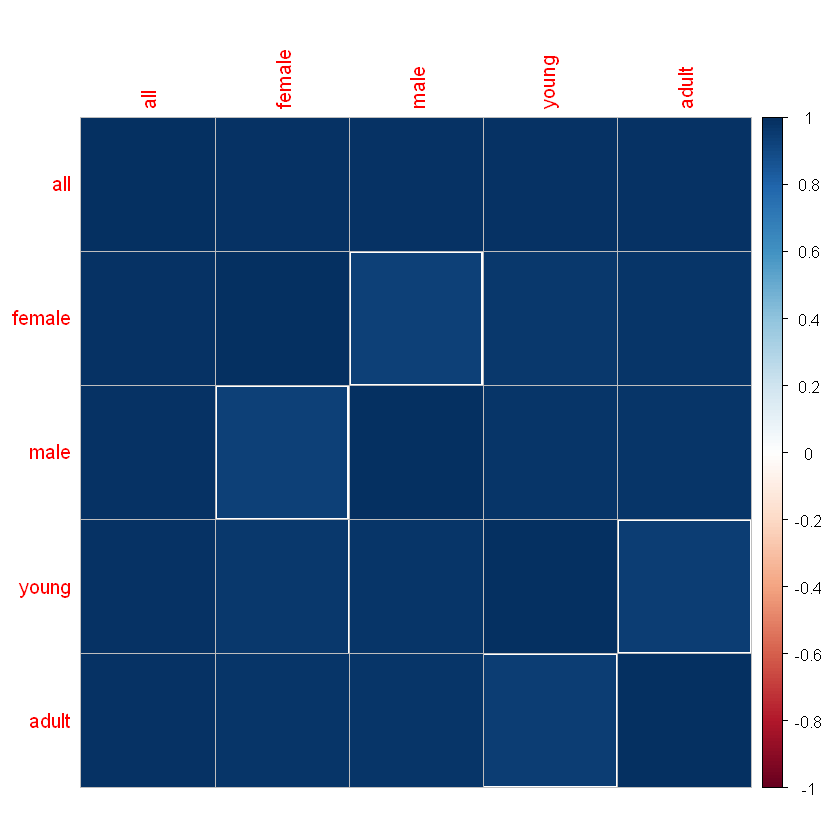

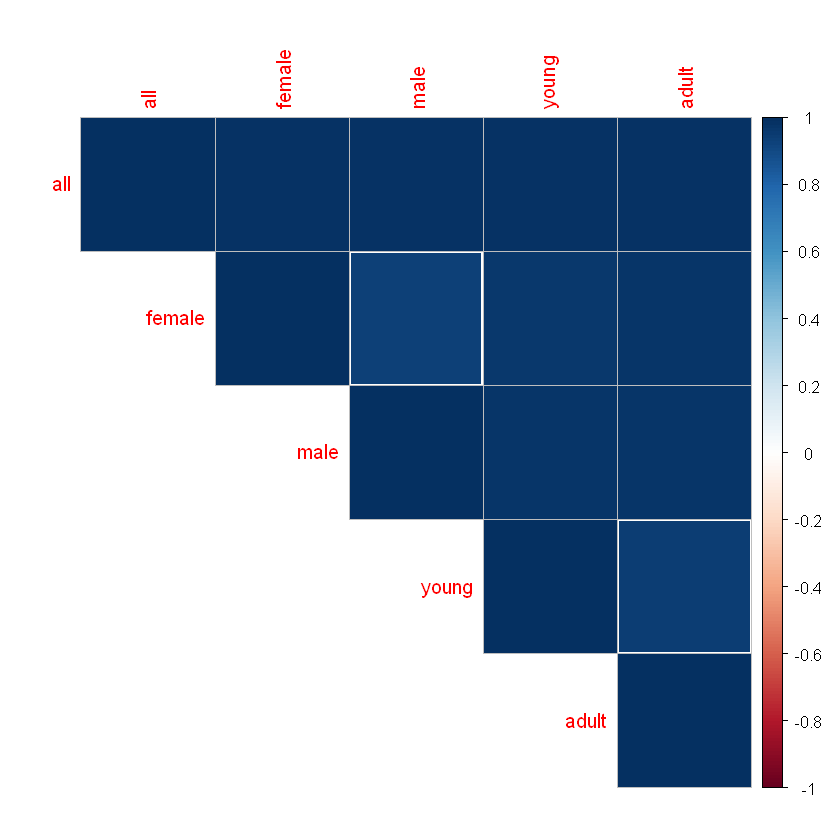

In [10]:
corrplot(cor_pessoas, method= 'square')
corrplot(cor_pessoas, method= 'square', type='upper')

[1]  7961  9371  9163  8300  8270 15735  7719 11110

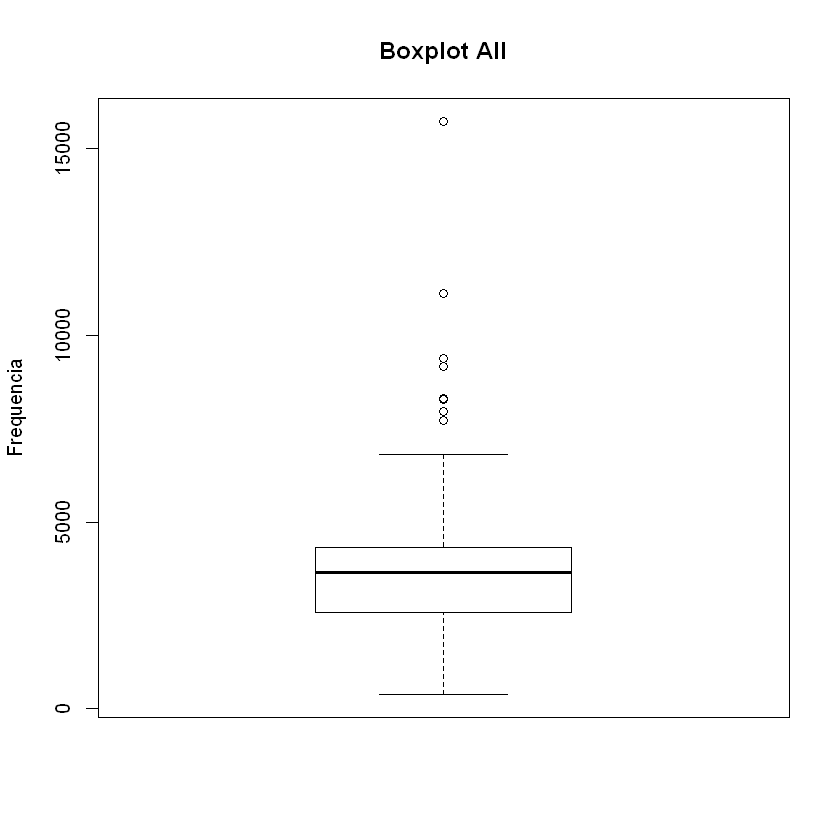

In [4]:
boxplot(data$all, main="Boxplot All", ylab="Frequencia")$out

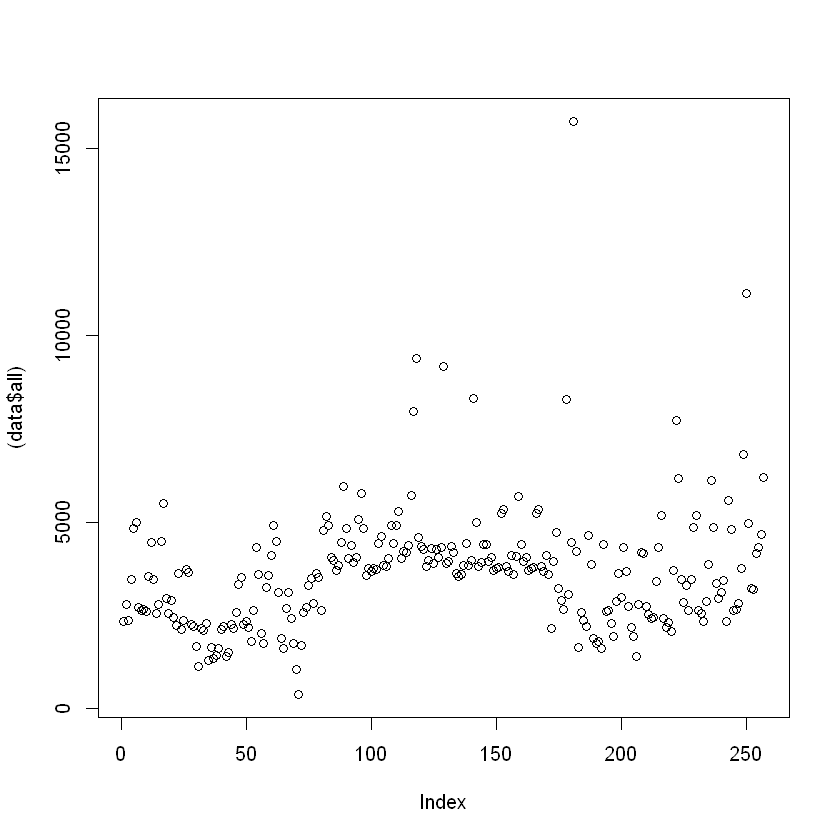

In [85]:
plot((data$all))

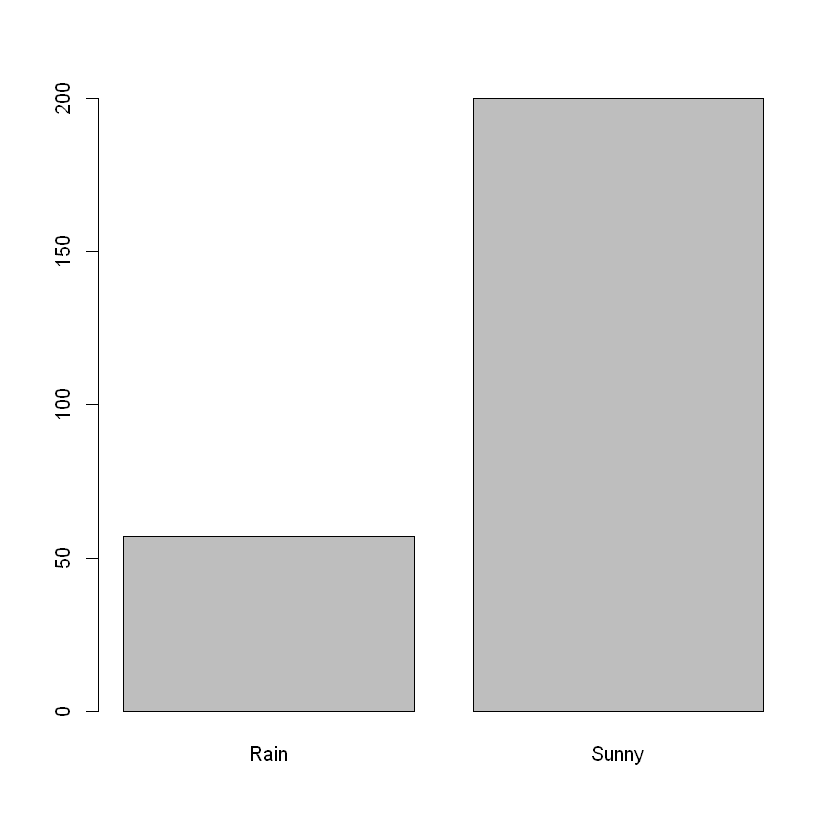

In [65]:
plot(data$weather)

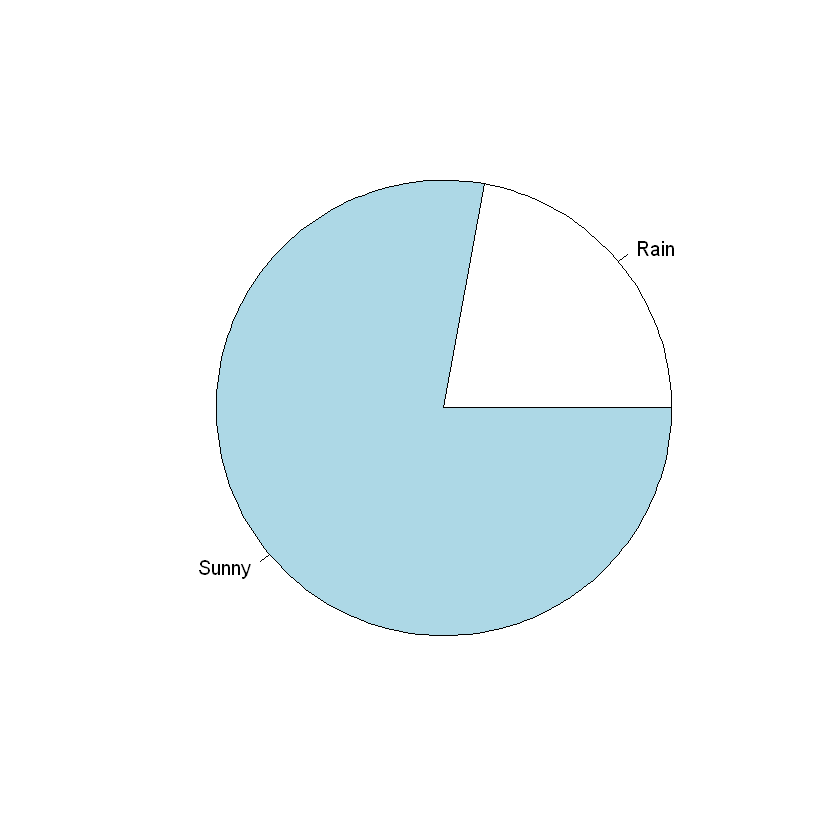

In [76]:
pie(table(data$weather))

In [77]:
?pie

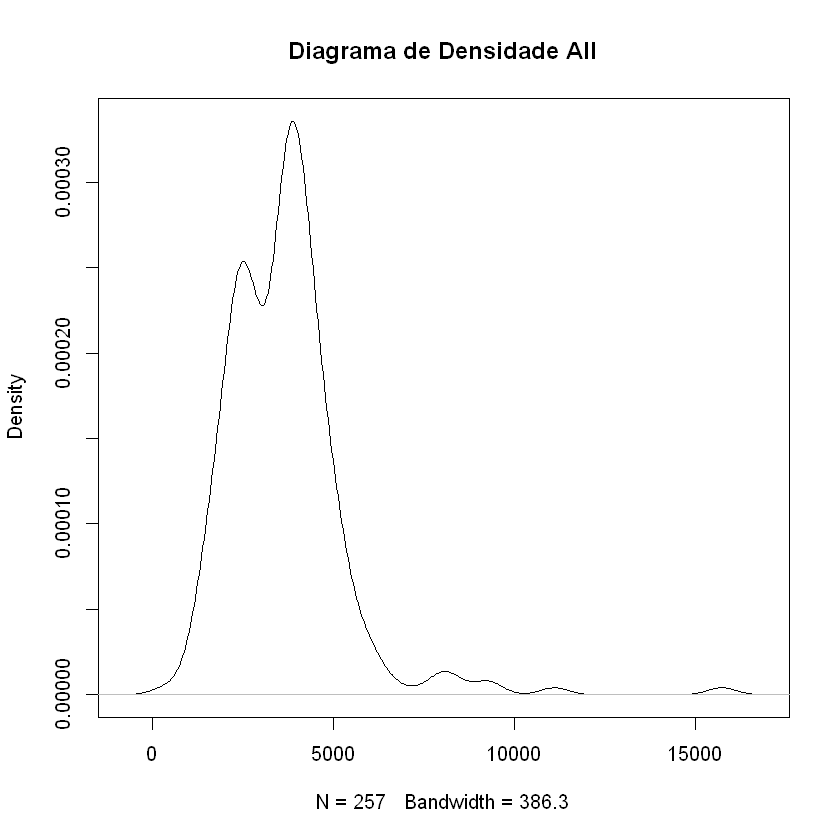

In [107]:
plot(density(data$all),main="Diagrama de Densidade All")

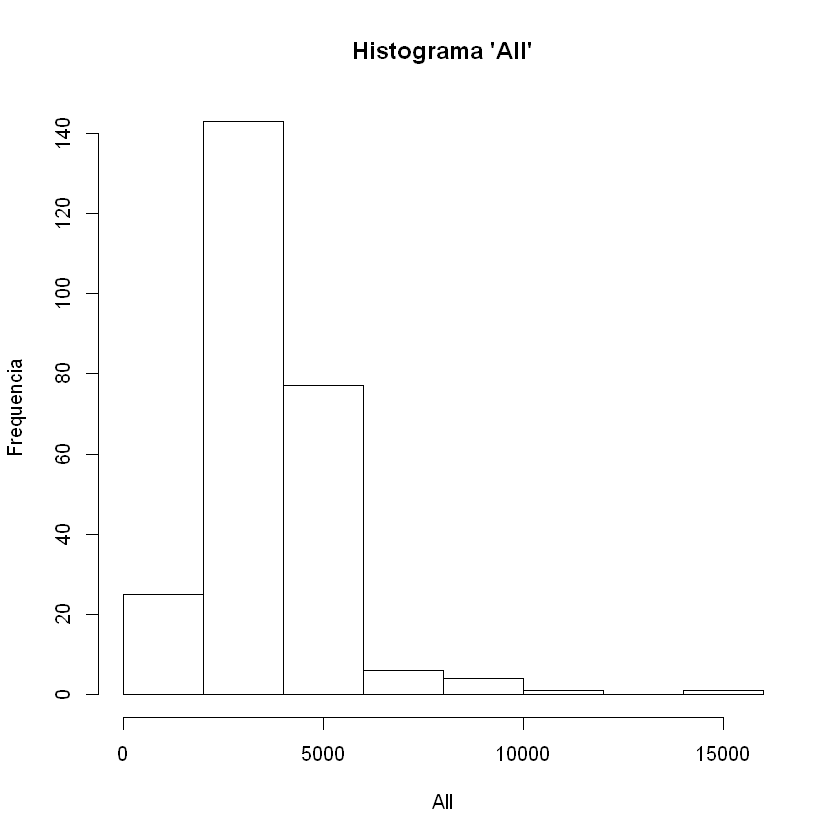

In [97]:
hist(data$all, main="Histograma 'All'", xlab="All", ylab="Frequencia")

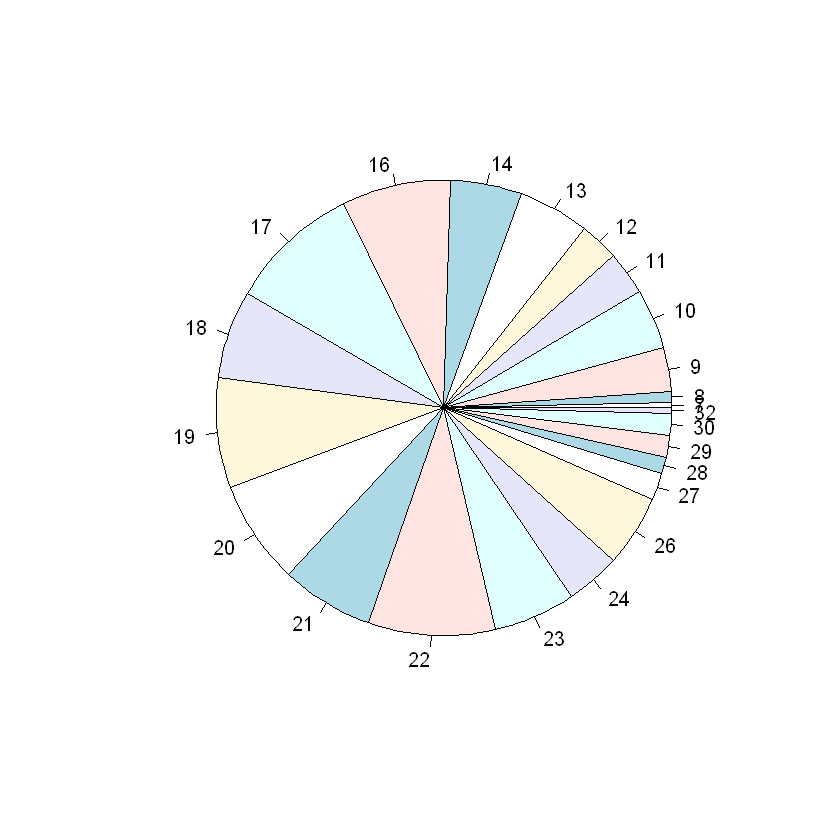

In [5]:
pie(table(data$maxtemp))

In [1]:
# ver que obsercações correspondem aos valores de 7961 9371 9163 8300 8270 15735 7719 11110
data[data$all %in% c(7961, 9371, 9163, 8300, 8270, 15735, 7719, 11110),]

,date,all,female,male,young,adult,weather,maxtemp,RH,maxwind
117,2013-08-03,7961,3693,3761,3496,4465,Sunny,21,68,42
118,2013-08-04,9371,4314,4448,4131,5240,Sunny,22,66,0
129,2013-08-15,9163,4189,4455,4005,5158,Sunny,26,70,32
141,2013-08-27,8300,3842,3850,3503,4797,Sunny,23,66,34
178,2013-10-03,8270,3715,4142,3766,4504,Rain,20,84,0
181,2013-10-06,15735,7645,7045,7495,8240,Sunny,21,68,39
222,2013-11-16,7719,3549,3768,3889,3830,Sunny,10,63,50
250,2013-12-14,11110,5246,5259,5953,5157,Rain,13,83,48
